In [1]:
#Importing libraries and reading dataset 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [6]:
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Checking for null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#Checking for duplicates
df.duplicated().sum()

0

<Axes: xlabel='Outcome', ylabel='count'>

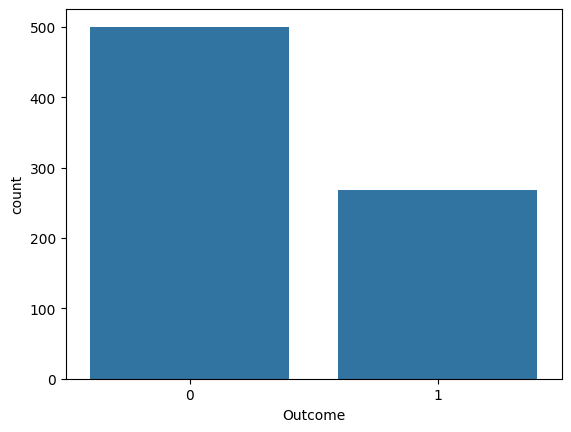

In [18]:
# Checking distribution of the target variable
sns.barplot(df["Outcome"].value_counts())

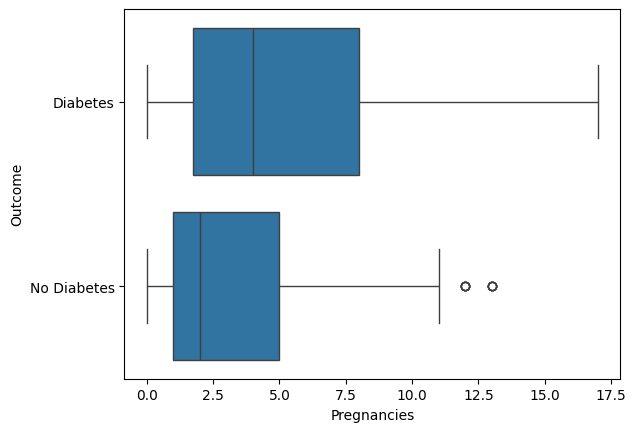

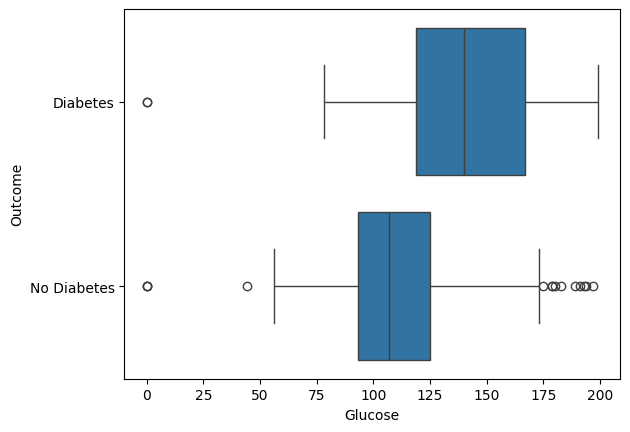

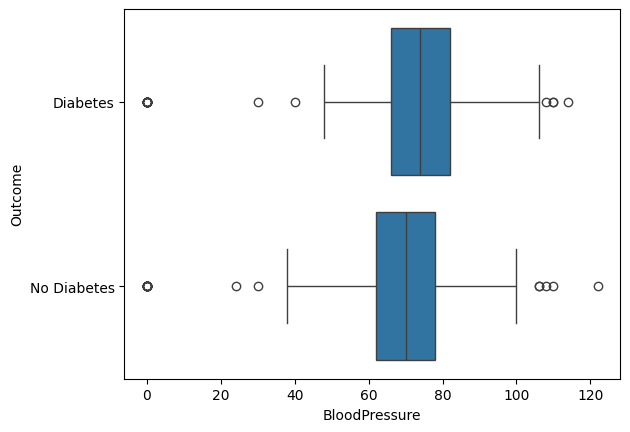

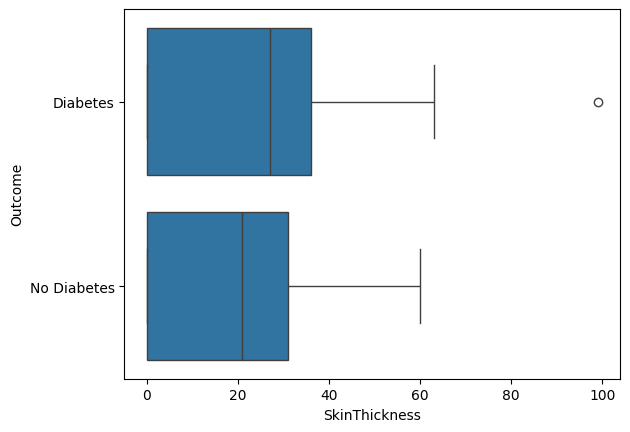

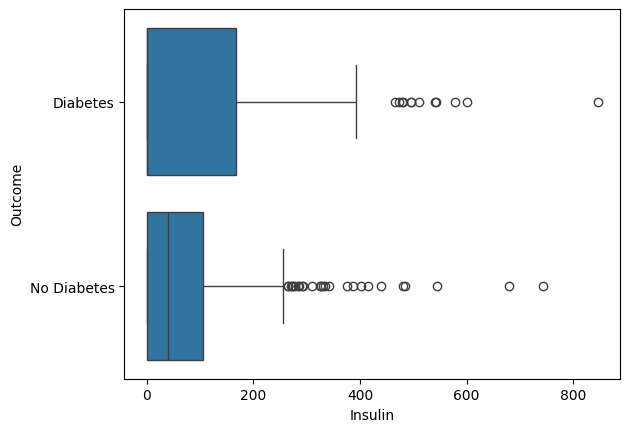

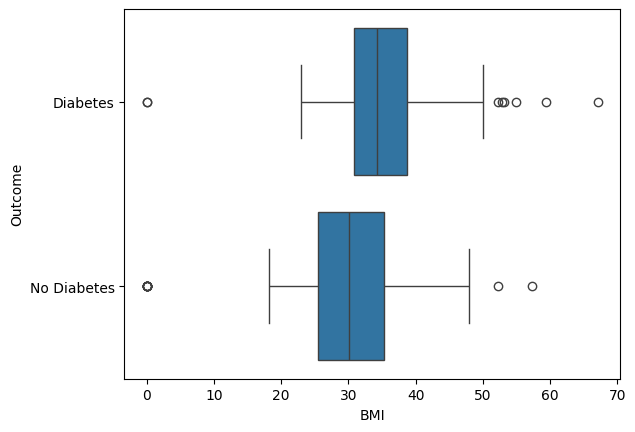

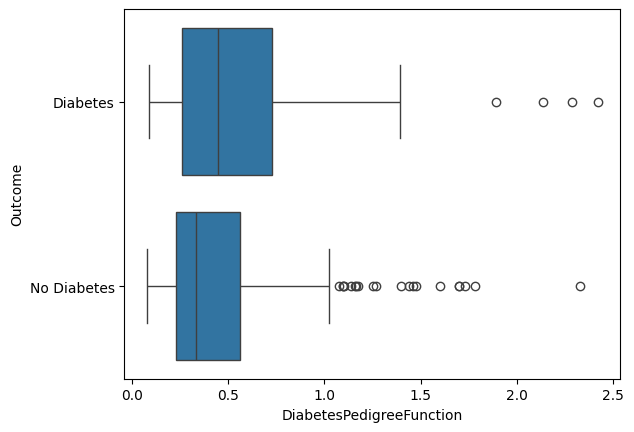

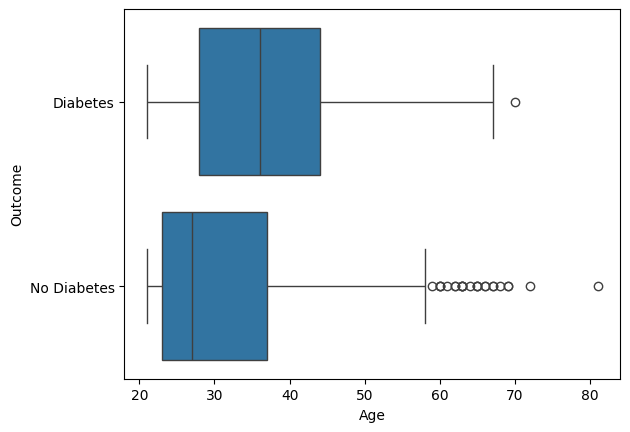

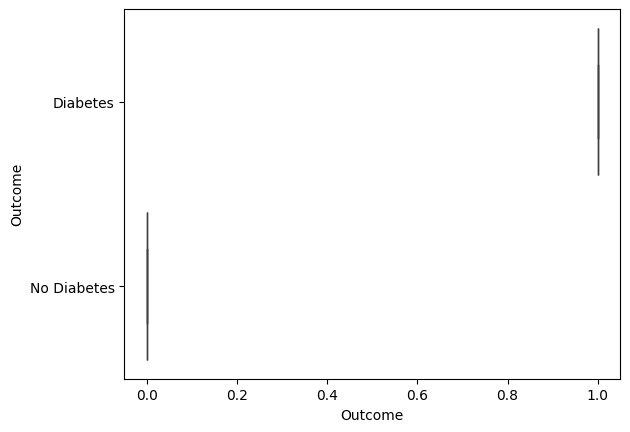

In [22]:
for col in df.select_dtypes(["int", "float"]):
    sns.boxplot(x=df[col], y=df["Outcome"].map({0:"No Diabetes", 1:"Diabetes"}), #stat="percent", kde=True, bins=20
                   )
    plt.show()


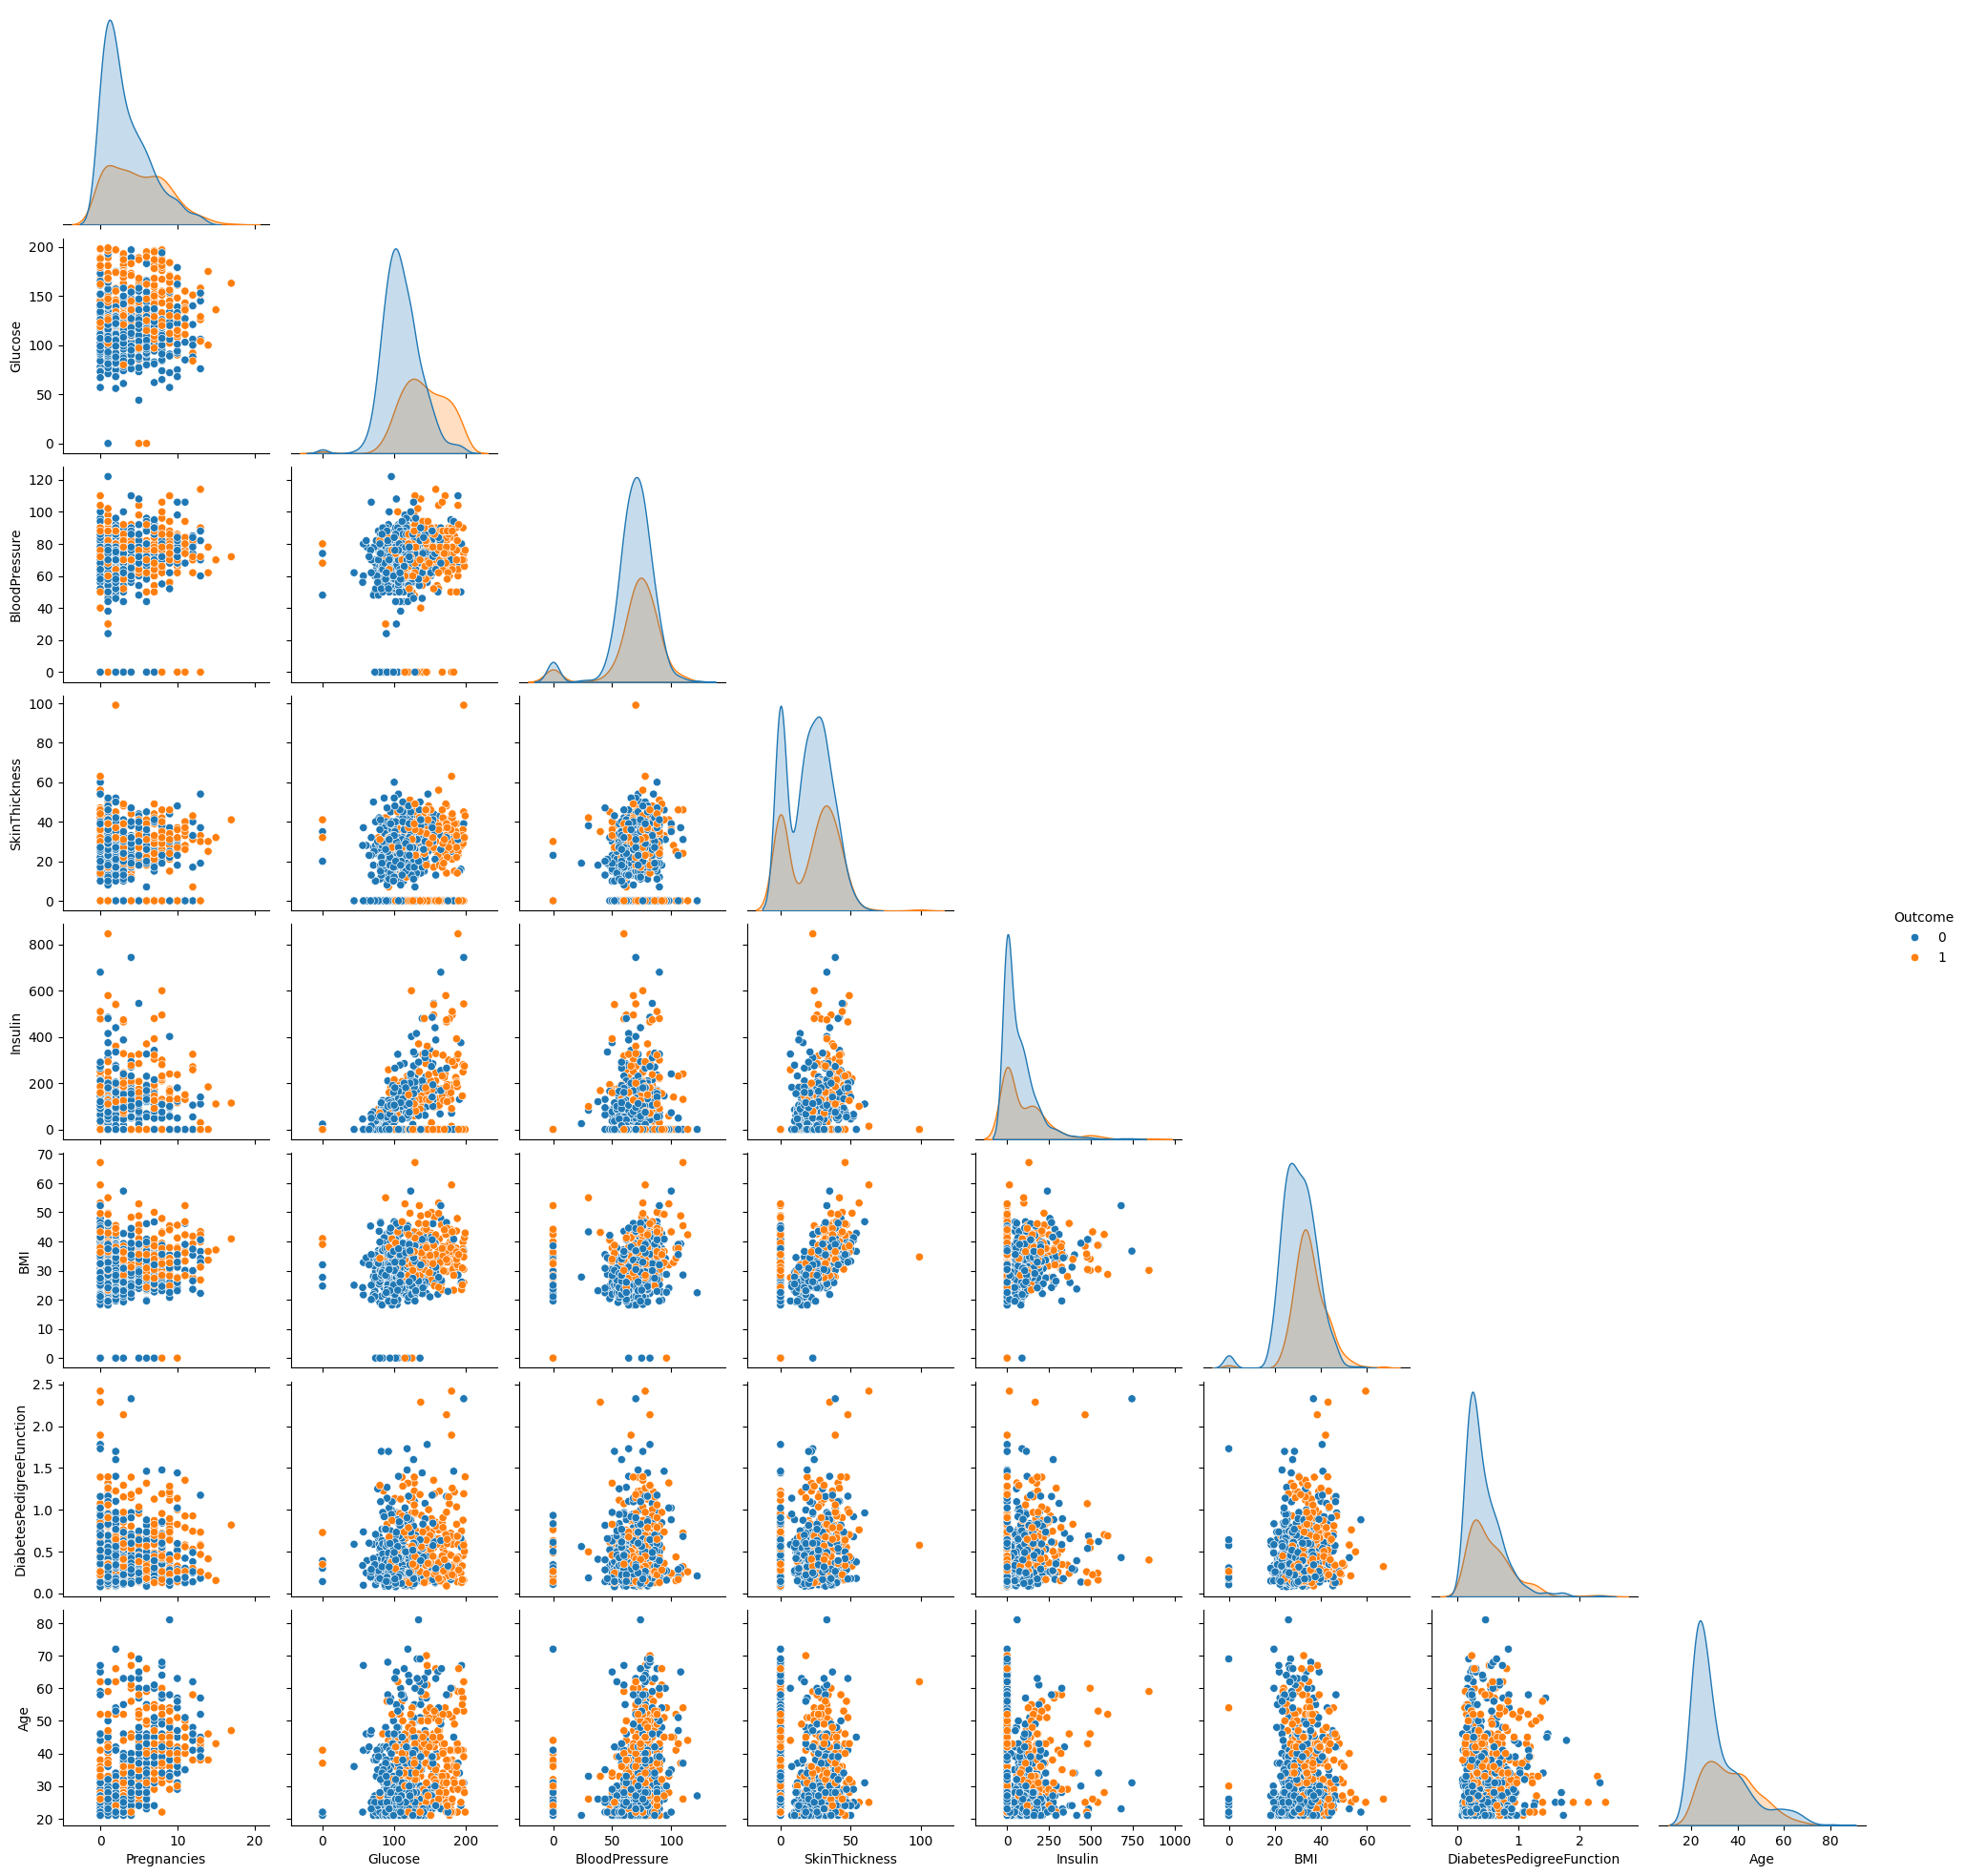

In [23]:
# Visualizing relationship between features and target
sns.pairplot(df.select_dtypes("number"), corner = True, hue = "Outcome")

# Feature Engineering

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
df_eng = df.copy() 
imputation_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Creating a dictionary mapping the columns to their median value
median_values = df_eng[imputation_cols].median()

for col in imputation_cols:
    # Using the replace method: replacing the value 0 with the calculated median for that column
    df_eng[col] = df_eng[col].replace(0, median_values[col])
    
df_eng[imputation_cols].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,27.334635,94.652344,32.450911
std,30.438286,12.096642,9.229014,105.547598,6.875366
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,23.000000,30.500000,27.500000
50%,117.000000,72.000000,23.000000,31.250000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [29]:
y = df_eng["Outcome"]
X = df_eng.iloc[:, :-1]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Standardizing Features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [36]:
# Balancing data set using SMOTE
import imblearn.over_sampling as OS


smt = OS.SMOTE(
    sampling_strategy="auto",
    random_state=42
)

X_train_smt, y_train_smt = smt.fit_resample(X_train_std, y_train)

# Logistic Regression

In [47]:
#Fitting Logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)

lr = logreg.fit(X_train_std, y_train)

print(f"Train Accuracy: {lr.score(X_train_std, y_train)}")
print(f"Test Accuracy: {lr.score(X_test_std, y_test)}")

Train Accuracy: 0.7687296416938111
Test Accuracy: 0.7662337662337663


In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)

lr_smt = logreg.fit(X_train_smt, y_train_smt)

print(f"Train Accuracy: {lr_smt.score(X_train_smt, y_train_smt)}")

Train Accuracy: 0.7618453865336658


In [42]:
Tuning lr model
from sklearn.model_selection import GridSearchCV

parameters = {
    "C": np.linspace(.1, 1.1, 11),
    "penalty": ["l1", "l2"],
}

gridsearch = GridSearchCV(LogisticRegression(solver="saga", max_iter=1000), parameters)

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [46]:
logreg = LogisticRegression(solver = "saga", max_iter=5000, **gridsearch.best_params_)

lr_tuned = logreg.fit(X_train_std, y_train)

print(f"Train Accuracy: {lr_tuned.score(X_train_std, y_train)}")
print(f"Test Accuracy: {lr_tuned.score(X_test_std, y_test)}")

Train Accuracy: 0.7638436482084691
Test Accuracy: 0.7792207792207793


<Axes: >

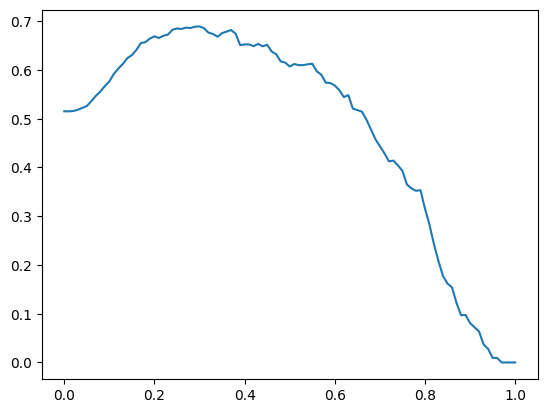

In [48]:
# Visualizing different f1 scores for different thresholds
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr_tuned.predict_proba(X_train_std)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)

In [49]:
thresh = thresholds[f1.index(max(f1))]

thresh

0.3

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
preds = lr_tuned.predict_proba(X_test_std)[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.7207792207792207
Precision: 0.581081081081081
Recall: 0.7818181818181819
F1: 0.6666666666666666


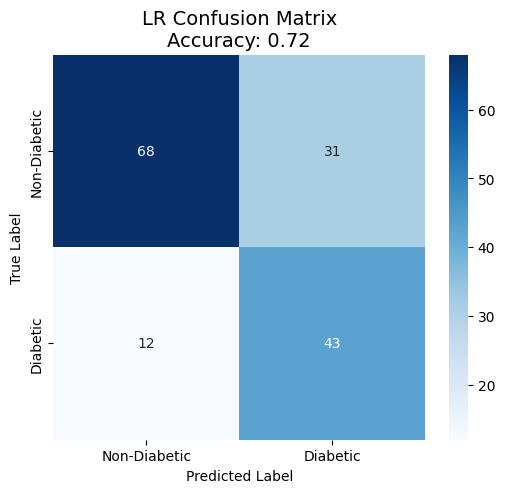

In [52]:
# Visualizing Confusion Matrix for clinical interpretation
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title(f'LR Confusion Matrix\nAccuracy: {accuracy_score(y_test, preds):.2f}', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

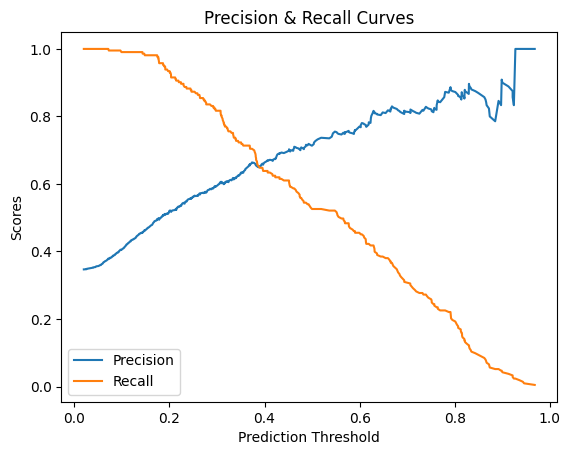

In [69]:
#Plotting Precision - Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr_tuned.predict_proba(X_train_std)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision & Recall Curves')
plt.show()

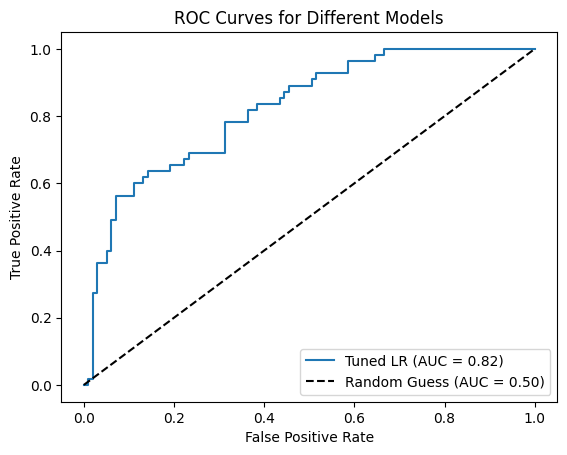

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
    
# Generate ROC AUC for tuned model
y_probs = lr_tuned.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)


# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Tuned LR (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

# Random Forest

In [58]:
#Fitting Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

rf.fit(X_train_std, y_train)

print(f"RF Train Accuracy: {rf.score(X_train_std, y_train)}")
print(f"RF Test Accuracy: {rf.score(X_test_std, y_test)}")

RF Train Accuracy: 1.0
RF Test Accuracy: 0.7337662337662337


In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

rf.fit(X_train_std, y_train)

print(f"RF Train Accuracy: {rf.score(X_train_smt, y_train_smt)}")
print(f"RF Test Accuracy: {rf.score(X_test_std, y_test)}")

RF Train Accuracy: 0.9600997506234414
RF Test Accuracy: 0.7337662337662337


In [60]:
# Tuning rf model
from sklearn.model_selection import RandomizedSearchCV
      
rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=50, stop=1050, step=100),
    'max_features': ["sqrt"],
    'bootstrap': [True],
    'max_samples': [.3, .5, .9],
    'max_depth': np.arange(start=3, stop=11, step=2),
    'min_samples_leaf': [2, 5, 10, 20, 100],
}

grid = RandomizedSearchCV(
    rf, 
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

{'n_estimators': 150,
 'min_samples_leaf': 5,
 'max_samples': 0.5,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': True}

In [62]:
rf_tuned = RandomForestClassifier(random_state=2023, n_jobs=-1, **grid.best_params_)

rf_tuned.fit(X_train, y_train)

print(f"RF Train Accuracy: {rf_tuned.score(X_train, y_train)}")
print(f"RF Test Accuracy: {rf_tuned.score(X_test, y_test)}")

RF Train Accuracy: 0.8664495114006515
RF Test Accuracy: 0.7662337662337663


<Axes: >

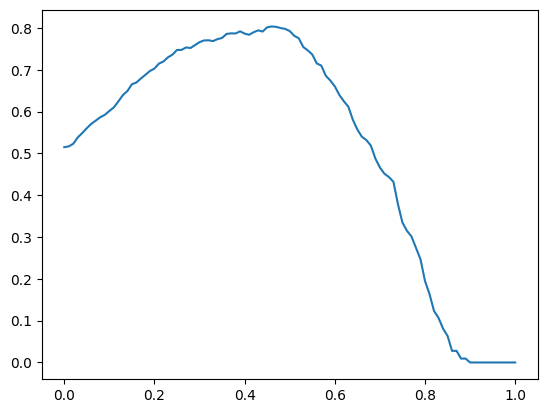

In [63]:
# Looking for threshold where f1 is maximum
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(rf_tuned.predict_proba(X_train)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)

In [64]:
thresh = thresholds[f1.index(max(f1))]

thresh

0.46

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
preds = rf_tuned.predict_proba(X_test)[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1: 0.6607142857142857


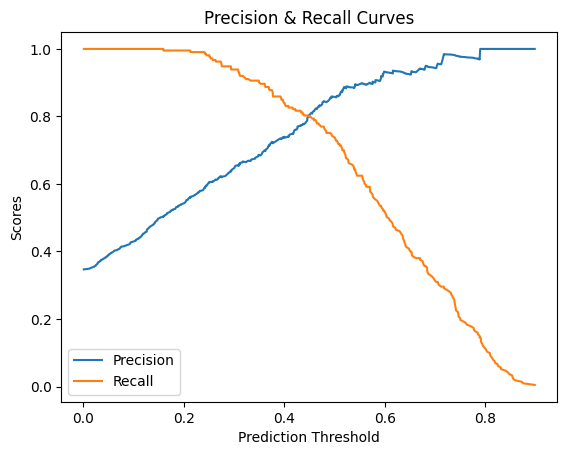

In [70]:
# Plotting Precision Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_train, rf_tuned.predict_proba(X_train)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision & Recall Curves')
plt.show()

In [82]:
new_df = pd.DataFrame(data = {"Precision":p_curve[:-1], "Recall": r_curve[:-1], "Threshold":t_curve})


In [83]:
new_df[new_df["Precision"] >= 0.6].sort_values(by = "Recall", ascending = False)

,Precision,Recall,Threshold
266,0.600575,0.981221,0.248169
269,0.605797,0.981221,0.250823
267,0.602305,0.981221,0.248876
268,0.604046,0.981221,0.250089
271,0.606414,0.976526,0.252146
...,...,...,...
609,1.000000,0.023474,0.854891
610,1.000000,0.018779,0.858213
611,1.000000,0.014085,0.872074
612,1.000000,0.009390,0.875073


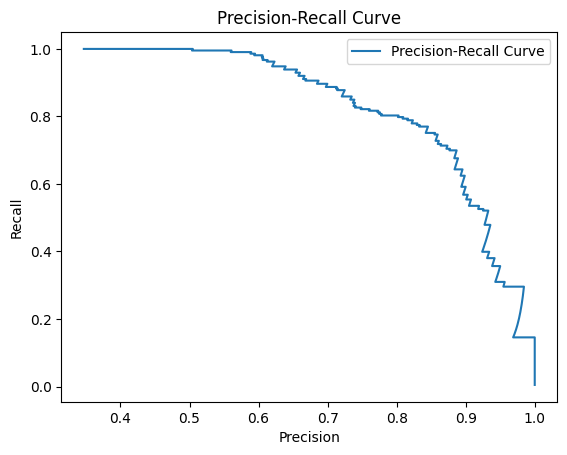

In [68]:
# Alternate View

plt.plot(p_curve[:-1],r_curve[:-1], label='Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

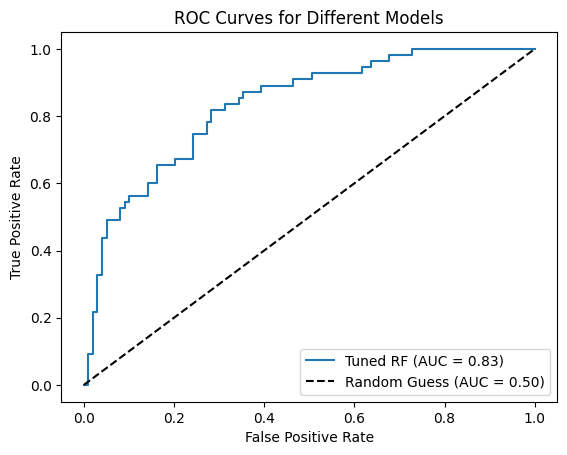

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
    
# Generate ROC AUC for tuned model
y_probs = rf_tuned.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)


# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Tuned RF (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

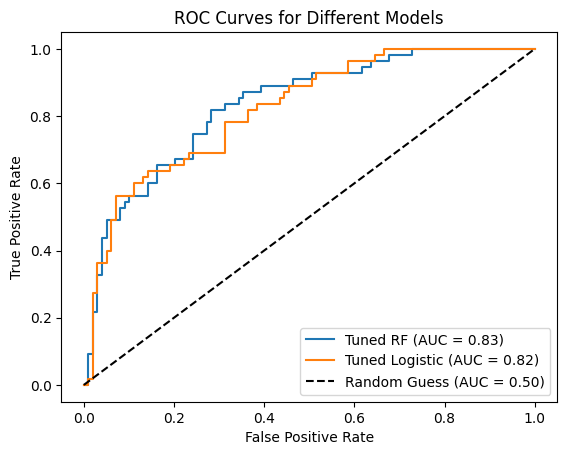

In [88]:
#Comparing Models
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
    
# Generate ROC AUC for tuned RF model
y_probs = rf_tuned.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score1 = auc(fpr1, tpr1)

# Generate ROC AUC for tuned Logistic Regression model
y_probs = lr_tuned.predict_proba(X_test_std)[:, 1]
fpr3, tpr3, thresholds = roc_curve(y_test, y_probs)
auc_score3 = auc(fpr3, tpr3)

# Plot the ROC curve
plt.plot(fpr1, tpr1, label=f'Tuned RF (AUC = {auc_score1:.2f})')
plt.plot(fpr3, tpr3, label=f'Tuned Logistic (AUC = {auc_score3:.2f})')


# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

In [86]:
preds = rf_tuned.predict_proba(X_test)[:, 1] > 0.25

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.6818181818181818
Precision: 0.532608695652174
Recall: 0.8909090909090909
F1: 0.6666666666666666


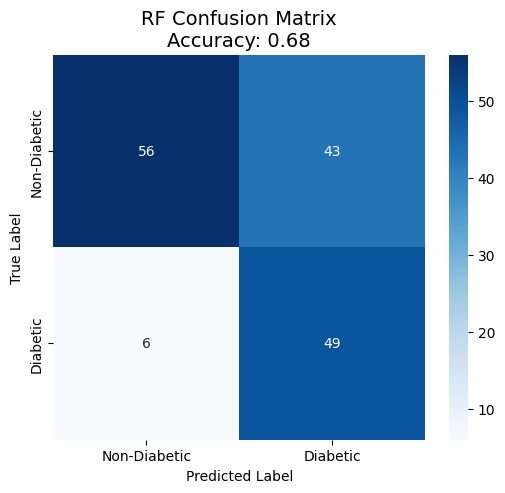

In [87]:
# Visualizing Confusion Matrix for clinical interpretation
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title(f'RF Confusion Matrix\nAccuracy: {accuracy_score(y_test, preds):.2f}', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Model Interpretation

In [92]:
import shap

explainer = shap.Explainer(rf_tuned)

shap_values = explainer(X_test)

<Axes: xlabel='Importance', ylabel='Feature'>

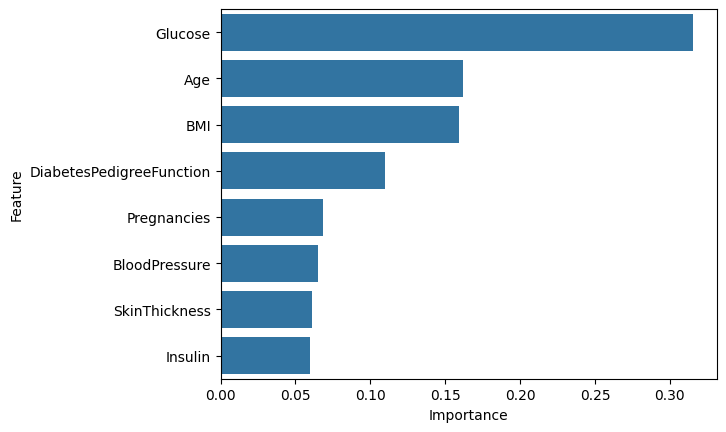

In [93]:
importance_df = (
    pd.DataFrame({"Feature": X_train.columns, "Importance": rf_tuned.feature_importances_})
    .sort_values("Importance", ascending=False)
)

sns.barplot(importance_df, x="Importance", y="Feature" )

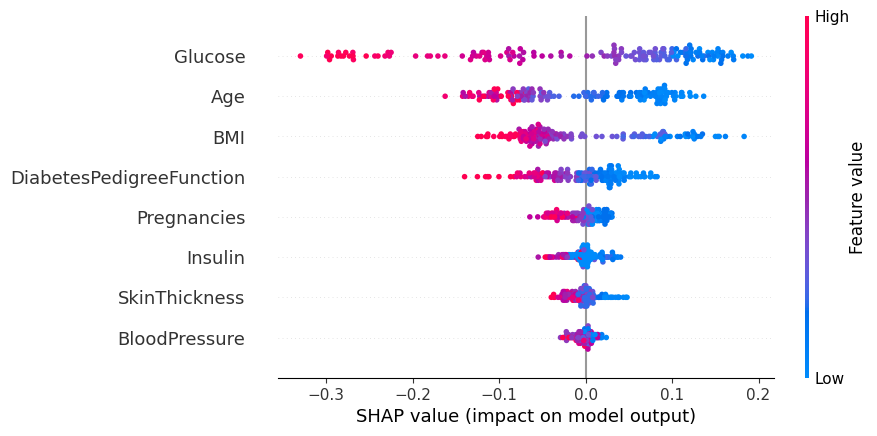

In [95]:
shap.plots.beeswarm(shap_values[:, :, 0])

* Glucose is the biggest driver and most critical biological factor
* The model also shows that risk increases significantly with age
* BMI is also a very significant factor as expected followed by family history